# LASSO and cross validation

In [51]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import lasso_path

## Reading data

We can see that the features are already normalized.

In [23]:
X = pd.read_csv('diabetesX.csv')
y = pd.read_csv('diabetesY.csv',header=None)
X.describe()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,...,ldl:hdl,ldl:tch,ldl:ltg,ldl:glu,hdl:tch,hdl:ltg,hdl:glu,tch:ltg,tch:glu,ltg:glu
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-1.161715e-18,5.651588e-19,-1.472553e-17,-4.081702e-18,7.064485e-18,-3.390953e-18,6.279542e-18,7.566848e-18,2.458833e-18,5.987151e-18,...,-6.279542e-20,1.601283e-18,3.124072e-18,-1.751600e-17,3.045578e-18,-4.528138e-18,-2.668805e-19,-8.712865e-19,-2.613859e-18,2.982782e-19
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,...,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,...,-2.564709e-01,-1.115079e-01,-1.825941e-01,-1.517344e-01,-2.348901e-01,-2.546851e-01,-2.232546e-01,-1.607454e-01,-1.289188e-01,-9.216539e-02
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,...,-1.503075e-02,-2.369634e-02,-2.119392e-02,-2.093422e-02,-1.562203e-02,-1.711673e-02,-1.350453e-02,-2.724511e-02,-2.061353e-02,-2.362366e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,...,6.398204e-03,-1.477062e-02,-8.660583e-03,-9.549844e-03,1.714849e-02,8.962967e-03,8.559629e-03,-1.335187e-02,-1.565272e-02,-1.352819e-02
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,...,1.997273e-02,1.023091e-02,2.066205e-02,1.211330e-02,3.130439e-02,2.251006e-02,2.208954e-02,1.507546e-02,1.765642e-02,1.307715e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,...,1.607729e-01,5.551291e-01,2.033809e-01,2.990323e-01,8.044499e-02,1.630665e-01,2.099052e-01,3.758453e-01,3.181041e-01,3.381838e-01


## Lasso Path and Training MSE

We next use `lasso_path()`, a built-in function of scikit-learn to generate the lasso path graph. Note the parameter alpha is the coefficient of the $\ell_1$ regularization.

In [24]:
X = X.values
y = y.values

In [53]:
alphas, coeffs, _ = lasso_path(X,y, n_alphas = 20) #coeffs: (n_output, n_features, n_alphas)
print(alphas)
colors = 'brgck'
nlalpha = -np.log10(alphas)
coeffs = coeffs.reshape(coeffs.shape[1],coeffs.shape[2]) #convert coeffs to (n_features, n_alphas)

[  2.14804358e+00   1.49330442e+00   1.03813447e+00   7.21703608e-01
   5.01723150e-01   3.48794319e-01   2.42479298e-01   1.68569861e-01
   1.17188553e-01   8.14686380e-02   5.66364102e-02   3.93732244e-02
   2.73719820e-02   1.90288047e-02   1.32286879e-02   9.19648855e-03
   6.39333259e-03   4.44459876e-03   3.08985304e-03   2.14804358e-03]


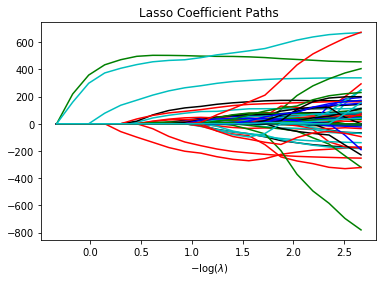

In [54]:
for i, coeff in enumerate(coeffs):
    plt.plot(nlalpha, coeff, c=colors[i%len(colors)])
    
    
plt.xlabel(r'$-\log(\lambda)$')
plt.title("Lasso Coefficient Paths")
plt.show()

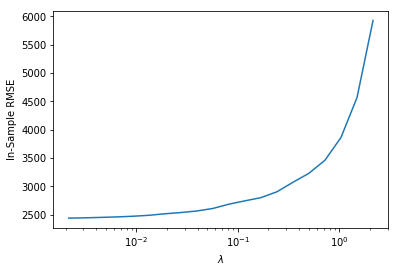

In [121]:
las = sk.linear_model.Lasso()
train_errors = []
for alpha in alphas:
    las.set_params(alpha=alpha)
    las.fit(X, y)
    y_pred = las.predict(X)
    train_errors.append(sk.metrics.mean_squared_error(y, y_pred))
    
plt.xlabel(r'$\lambda$')
plt.ylabel('In-Sample MSE')
plt.xscale('log')
plt.plot(alphas, train_errors)
plt.show()

## Cross Validation

We implement our own cross validation function here.

In [122]:
def random_partition(X, y, k):
    '''Helper function that randomly partitions dataset X,y into k parts'''
    N = X.shape[0]                  
    X_partitions = []
    y_partitions = []
    
    permutation = list(np.random.permutation(N))
    shuffled_X = X[permutation, :]
    shuffled_y = y[permutation, :]
    
    len_complete_part = N//k 
    for i in range(k-1):

        X_partitions.append(shuffled_X[i*len_complete_part:(i+1)*len_complete_part, :]) 
        y_partitions.append(shuffled_y[i*len_complete_part:(i+1)*len_complete_part, :])
    
    # Handling the end case 
    X_partitions.append(shuffled_X[len_complete_part*(k-1):, :])
    y_partitions.append(shuffled_y[len_complete_part*(k-1):, :])
    
    return X_partitions, y_partitions

In [123]:
def kfoldCV(classifier, X, y, k, alpha):
    '''
    Perform k-fold cross validation on dataset (X,y).
    Return MOOSE
    '''
    X_partitions, y_partitions = random_partition(X, y, k)
    errors = []
        
    # Run the algorithm k times
    for i in range(k):
        train_X = np.concatenate(X_partitions[:i] + X_partitions[i+1:], axis = 0)
        train_y = np.concatenate(y_partitions[:i] + y_partitions[i+1:], axis = 0)
        test_X = X_partitions[i]
        test_y = y_partitions[i]     
        
        # Train and classify model
        classifier.set_params(alpha=alpha, max_iter=10000)
        classifier.fit(train_X, train_y)
        y_pred = classifier.predict(test_X)
        errors.append(sk.metrics.mean_squared_error(y_pred, test_y))
        

    MOOSE = sum(errors)/k
    
    return MOOSE

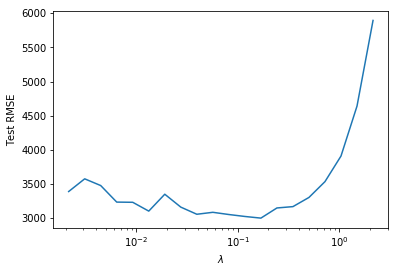

In [126]:
MOOSEs = []
for alpha in alphas:
    MOOSEs.append(kfoldCV(las, X, y, 5, alpha))

plt.xlabel(r'$\lambda$')
plt.ylabel('Test MSE')
plt.xscale('log')
plt.plot(alphas, MOOSEs)
plt.show()


## Mallows' $C_p$, in-sample MSE, MOOSE

We have already calculated MOOSE and in-sample MSE, now we calculate Mallows' $C_p$ statistic.

In [131]:
cp = train_errors.copy()
N = X.shape[0]
P = X.shape[1]


# Calculate variance
ols = sk.linear_model.LinearRegression()
ols.fit(X,y)
ols_pred = ols.predict(X)
sigma_square = 1 / ( N - P - 1 ) * np.sum((y - ols_pred)**2)
print(sigma_square)

2833.47475347


In [134]:
for i in range(len(cp)):
    cp[i] += 2 * np.count_nonzero(coeffs[:,i]) / N * sigma_square

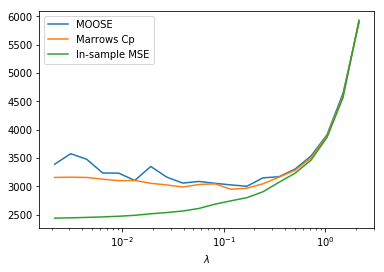

In [135]:
plt.xlabel(r'$\lambda$')
plt.xscale('log')
plt.plot(alphas, MOOSEs, label = 'MOOSE')
plt.plot(alphas, cp, label = 'Marrows Cp')
plt.plot(alphas, train_errors, label = 'In-sample MSE')
plt.legend()
plt.show()

For this dataset, Marrows' $C_p$ statistic is pretty close to the MOOSE obtained by CV!